# Trunk / Tailgate Corrosion Warranty Extension

**BACKGROUND per Service Bulletin 13-004**<br>
Dissimilar metals in the chrome trim and the trunk lid,
along with road salt, may create a very low
electrochemical reaction that forms corrosion, rust
spots or stains on the trunk lid.
American Honda is extending the warranty on the trunk
lid to 7 years from the original date of purchase.
Vehicles owned or registered in these states as shown
in the shaded area are eligible for the warranty
extension. These states include: Colorado,
Connecticut, Delaware, Illinois, Indiana, Iowa, Maine,
Maryland, Massachusetts, Michigan, Minnesota,
Montana, Nebraska, New Hampshire, , New Jersey,
New York, North Dakota, Ohio, Pennsylvania, Rhode
Island, South Dakota, Vermont, West Virginia
Wisconsin, Wyoming.

**Criteria:**<br>
defect code = "5TV00" or "5T600"

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pyodbc
from getpass import getpass
import pandas as pd
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",50)
pd.set_option('precision',3)

userid = getpass(prompt='Enter user ID: ')
pw     = getpass(prompt='Enter password: ')

Enter user ID: ········
Enter password: ········


In [3]:
cnxn_string = 'DSN=MMP-SQLP-WARRANTY;UID=' + userid + ';PWD=' + pw

cnxn = pyodbc.connect(cnxn_string)
cursor = cnxn.cursor()

sql = """
SELECT
SUBSTRING(WAR_DEFECT_CODE,1,3)+'-'+YEAR+'-'+FACTORY+'-'+MODEL_NAME+'-'+VEHICLE_DESTN_CODE as GROUPING,
YEAR,
FACTORY,
MODEL_NAME,
DOORS,
VIN,
WAR_DEFECT_CODE,
VEHICLE_DESTN_CODE,
WAR_TOTAL_CHG_AMT_USD,
WAR_CLAIM_DATE

FROM (


SELECT DISTINCT
WRCLA1.VIN_MANU_CODE+WRCLA1.VIN_CAR_TYPE+WRCLA1.VIN_MODEL_TYPE+WRCLA1.VIN_TRANS_TYPE+WRCLA1.VIN_NO_DOORS+WRCLA1.VIN_GRADE+WRCLA1.VIN_CHECK_NO+WRCLA1.VIN_MODEL_YR+WRCLA1.VIN_FACTORY+right('000000'+substring(cast(WRCLA1.VIN_SERIAL_NO as VARCHAR(26)),1,6),6) AS VIN,
CASE WHEN WRCLA1.WAR_ORIG_DISTR_CDE = '130' AND WRCLA1.WAR_RESP_DISTR_CDE = '140' THEN '0'+ SUBSTRING(WRCLA1.DEALER_NO,1,5)
WHEN WRCLA1.WAR_ORIG_DISTR_CDE = '130' AND WRCLA1.WAR_RESP_DISTR_CDE <> '140' THEN RIGHT(WRCLA1.DEALER_NO,6)
ELSE WRCLA1.DEALER_NO END AS DEALER_NO,

CASE WHEN (WRCLA1.WAR_ORIG_DISTR_CDE = '130') THEN SUBSTRING(WRCLA1.WAR_CLAIM_NO,2,6)
ELSE WRCLA1.WAR_CLAIM_NO END AS WAR_CLAIM_NO,

CAST(YEAR(WRCLA1.REPAIR_ORDER_DATE) AS CHAR(4)) AS RO_YR,

WRCLA1.WAR_CLAIM_DATE,
WRCLA1.PART_NO,
SUBSTRING(WRCLA1.PART_NO,1,5) AS SHRT_PART_NO,
WRCLA1.WAR_LABOR_CHG_AMT,
WRCLA1.WAR_PARTS_CHG_AMT,
WRCLA1.WAR_HDLG_CHG_AMT,
WRCLA1.WAR_TOTAL_CHG_AMT,
WRCLA1.CURRENCY_TYPE_CODE,
WRCLA1.WAR_EXCH_RATE_AMT,
WRCLA1.WAR_TOTAL_CHG_AMT * WRCLA1.WAR_EXCH_RATE_AMT AS WAR_TOTAL_CHG_AMT_USD,
WRCLA1.WAR_ORIG_DISTR_CDE,
WRCLA1.WAR_RESP_DISTR_CDE,
WRCLA1.CAMPAIGN_CODE,
WRCLA1.WAR_DEFECT_CODE,
CASE WHEN WRCLA1.VEHICLE_DESTN_CODE = 'KA' OR WRCLA1.VEHICLE_DESTN_CODE = 'KL' THEN 'KA/KL'
ELSE WRCLA1.VEHICLE_DESTN_CODE END AS VEHICLE_DESTN_CODE,
WRCLA1.MODEL_YEAR_CODE,
WRSAL1.MTC_MODEL,
WRSAL1.MTC_TYPE,
WRCLA1.MTC_MODEL_CODE,
WRCLA1.PROC_DATE_AF_OFF,
WRCLA1.REPAIR_ORDER_DATE,
WRCLA1.VEH_SALE_DATE,
DATEDIFF(d, WRCLA1.VEH_SALE_DATE, WRCLA1.REPAIR_ORDER_DATE) AS DAYS_IN_SERVICE,
WRCLA1.VEHICLE_ODOM_QTY,

CASE
WHEN WRCLA1.VIN_MODEL_YR = 'G' THEN '2016M'
WHEN WRCLA1.VIN_MODEL_YR = 'F' THEN '2015M'
WHEN WRCLA1.VIN_MODEL_YR = 'E' THEN '2014M'
WHEN WRCLA1.VIN_MODEL_YR = 'D' THEN '2013M'
WHEN WRCLA1.VIN_MODEL_YR = 'C' THEN '2012M'
WHEN WRCLA1.VIN_MODEL_YR = 'B' THEN '2011M'
WHEN WRCLA1.VIN_MODEL_YR = 'A' THEN '2010M'
WHEN WRCLA1.VIN_MODEL_YR = '9' THEN '2009M'
WHEN WRCLA1.VIN_MODEL_YR = '8' THEN '2008M'
WHEN WRCLA1.VIN_MODEL_YR = '7' THEN '2007M'
WHEN WRCLA1.VIN_MODEL_YR = '6' THEN '2006M'
WHEN WRCLA1.VIN_MODEL_YR = '5' THEN '2005M'
WHEN WRCLA1.VIN_MODEL_YR = '4' THEN '2004M'
WHEN WRCLA1.VIN_MODEL_YR = '3' THEN '2003M'
WHEN WRCLA1.VIN_MODEL_YR = '2' THEN '2002M'
WHEN WRCLA1.VIN_MODEL_YR = '1' THEN '2001M'
WHEN WRCLA1.VIN_MODEL_YR = 'Y' THEN '2000M'
WHEN WRCLA1.VIN_MODEL_YR = 'X' THEN '1999M'
WHEN WRCLA1.VIN_MODEL_YR = 'W' THEN '1998M'
WHEN WRCLA1.VIN_MODEL_YR = 'V' THEN '1997M'
WHEN WRCLA1.VIN_MODEL_YR = 'T' THEN '1996M'
WHEN WRCLA1.VIN_MODEL_YR = 'S' THEN '1995M'
WHEN WRCLA1.VIN_MODEL_YR = 'R' THEN '1994M'
WHEN WRCLA1.VIN_MODEL_YR = 'P' THEN '1993M'
WHEN WRCLA1.VIN_MODEL_YR = 'N' THEN '1992M'
ELSE WRCLA1.VIN_MODEL_YR END AS YEAR,

CASE WHEN WRCLA1.VIN_FACTORY = 'L' THEN 'ELP'
WHEN WRCLA1.VIN_FACTORY = 'H' THEN 'HCM'
WHEN WRCLA1.VIN_FACTORY = '4' THEN 'LAFIN'
WHEN WRCLA1.VIN_FACTORY = 'A' THEN 'MAP'
WHEN WRCLA1.VIN_FACTORY = 'C' THEN 'CSS'
WHEN WRCLA1.VIN_FACTORY = 'G' THEN 'HDM'
WHEN WRCLA1.VIN_FACTORY = 'M' THEN 'HCL'
WHEN WRCLA1.VIN_FACTORY = 'T' THEN 'HGT'
WHEN WRCLA1.VIN_FACTORY = 'S' AND WRCLA1.VIN_MODEL_TYPE = 'CZ' THEN 'AEP'
WHEN WRCLA1.VIN_FACTORY = 'S' THEN 'SSS'
WHEN WRCLA1.VIN_FACTORY = 'B' THEN 'HMA'
WHEN WRCLA1.VIN_FACTORY = 'E' THEN 'HMIN'
ELSE WRCLA1.VIN_FACTORY END AS FACTORY,

CASE
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'ZA' THEN 'FIT'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'GK' THEN 'FIT'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'GD' THEN 'FIT'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'GE' THEN 'FIT'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'TB' THEN 'RDX'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'DE' THEN 'ILX'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'FG' THEN 'CIVIC'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'FA' THEN 'CIVIC'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,1) = 'E' THEN 'CIVIC'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'CL' THEN 'TSX'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'CU' THEN 'TSX'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'CW' THEN 'TSX'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'YA' THEN 'CL'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,1) = 'C'
    AND (WRCLA1.VIN_FACTORY = 'A'
         OR WRCLA1.VIN_FACTORY = 'C'
         OR WRCLA1.VIN_FACTORY = 'G'
         or WRCLA1.VIN_FACTORY = 'L')
    THEN 'ACCORD'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'YD' THEN 'MDX'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'AP' THEN 'S2000'
WHEN WRCLA1.VIN_MODEL_YR <= '1'
    AND (SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'DC'
         OR SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'DB')
    THEN 'INTEGRA'
WHEN WRCLA1.VIN_MODEL_YR > '1'
    AND (SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'DC'
         OR SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'DB')
    THEN 'RSX'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'RD' THEN 'CRV'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'RE' THEN 'CRV'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'RM' THEN 'CRV'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'CZ' THEN 'VUE'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'NA'  THEN 'NSX'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'KA' THEN 'RL'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'KC' THEN 'RLX'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'YK' THEN 'RIDGELINE'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'YF' THEN 'PILOT'
WHEN WRCLA1.VIN_FACTORY = '4'
    AND (SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,1) = 'C'
         OR SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,1) = 'D')
    THEN 'PASSPORT'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'UA' THEN 'TL'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'UB' THEN 'TLX'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'RL' OR SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'RA' THEN 'ODYSSEY'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,1) = 'B' THEN 'PRELUDE'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'ZE' THEN 'INSIGHT'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'KB' THEN 'RL'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'YH' THEN 'ELEMENT'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'TF' THEN 'CROSSTOUR'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'ZF' THEN 'CRZ'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'DC' THEN 'RSX'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'YB' THEN 'ZDX'
WHEN SUBSTRING(WRCLA1.VIN_MODEL_TYPE,1,2) = 'RU' THEN 'HRV'
ELSE WRCLA1.VIN_MODEL_TYPE END AS MODEL_NAME,

CASE WHEN WRCLA1.VIN_NO_DOORS = '1'
OR WRCLA1.VIN_NO_DOORS = '2'
OR WRCLA1.VIN_NO_DOORS = 'A'
OR WRCLA1.VIN_NO_DOORS = 'B'
OR WRCLA1.VIN_NO_DOORS = 'C'
OR WRCLA1.VIN_NO_DOORS = 'D' THEN '2Dr'
WHEN WRCLA1.VIN_NO_DOORS = '3' OR WRCLA1.VIN_NO_DOORS = '4' THEN '3Dr'
WHEN WRCLA1.VIN_NO_DOORS = '5'
OR WRCLA1.VIN_NO_DOORS = '6'
OR WRCLA1.VIN_NO_DOORS = 'E'
OR WRCLA1.VIN_NO_DOORS ='F' THEN '4Dr'
WHEN WRCLA1.VIN_NO_DOORS = '7'
OR WRCLA1.VIN_NO_DOORS = '8'
OR WRCLA1.VIN_NO_DOORS = 'G'
OR WRCLA1.VIN_NO_DOORS ='H' THEN '5Dr'
ELSE WRCLA1.VIN_NO_DOORS END AS DOORS,

CASE WHEN RTRIM(LTRIM(WRCLA1.ENGINE_SER_NO)) = '' THEN '??'
WHEN WRCLA1.ENGINE_SER_NO IS NULL THEN '??'
WHEN SUBSTRING(WRCLA1.ENGINE_SER_NO,2,2) >= '27' THEN 'V6'
WHEN SUBSTRING(WRCLA1.ENGINE_SER_NO,2,2) < '27' THEN 'L4'
ELSE '??' END AS ENG_SIZE,

CASE WHEN WRCLA1.VIN_NO_DOORS = '1'
OR WRCLA1.VIN_NO_DOORS = '3'
OR WRCLA1.VIN_NO_DOORS = '5'
OR WRCLA1.VIN_NO_DOORS = '7'
OR WRCLA1.VIN_NO_DOORS = '9' THEN 'M/T'
ELSE 'A/T' END AS TRANSMISSION,

CAST(YEAR(WRCLA1.PROC_DATE_AF_OFF) AS CHAR(4))+' - '+RIGHT(RTRIM('0' + CAST(MONTH(WRCLA1.PROC_DATE_AF_OFF) AS CHAR(2))),2) AS AF_MTH,
CAST(YEAR(WRCLA1.REPAIR_ORDER_DATE) AS CHAR(4))+' - '+RIGHT(RTRIM('0' + CAST (MONTH(WRCLA1.REPAIR_ORDER_DATE) AS CHAR(2))),2) AS RO_MTH

FROM WAR.WRCLA1 AS WRCLA1

LEFT JOIN WAR.WRSAL1 WRSAL1 ON
WRCLA1.VIN_CAR_TYPE = WRSAL1.VIN_CAR_TYPE
AND WRCLA1.VIN_CHECK_NO = WRSAL1.VIN_CHECK_NO
AND WRCLA1.VIN_FACTORY = WRSAL1.VIN_FACTORY
AND WRCLA1.VIN_GRADE = WRSAL1.VIN_GRADE
AND WRCLA1.VIN_MANU_CODE = WRSAL1.VIN_MANU_CODE
AND WRCLA1.VIN_MODEL_TYPE = WRSAL1.VIN_MODEL_TYPE
AND WRCLA1.VIN_MODEL_YR = WRSAL1.VIN_MODEL_YR
AND WRCLA1.VIN_NO_DOORS = WRSAL1.VIN_NO_DOORS
AND WRCLA1.VIN_SERIAL_NO = WRSAL1.VIN_SERIAL_NO
AND WRCLA1.VIN_TRANS_TYPE = WRSAL1.VIN_TRANS_TYPE

WHERE
WAR_DEFECT_CODE IN( '5TV00', '5T600' )

) AS TEMP
"""

df = pd.read_sql(sql, cnxn, index_col=None)

# Close connections
cursor.close()
cnxn.close()

In [4]:
df.head()

,GROUPING,YEAR,FACTORY,MODEL_NAME,DOORS,VIN,WAR_DEFECT_CODE,VEHICLE_DESTN_CODE,WAR_TOTAL_CHG_AMT_USD,WAR_CLAIM_DATE
0,5T6-2009M-HMIN-CIVIC-KA/KL,2009M,HMIN,CIVIC,4Dr,19XFA15579E005847,5T600,KA/KL,159.58,201307
1,5T6-2009M-HMIN-CIVIC-KA/KL,2009M,HMIN,CIVIC,4Dr,19XFA155X9E033402,5T600,KA/KL,314.91,201305
2,5T6-2009M-HMIN-CIVIC-KA/KL,2009M,HMIN,CIVIC,4Dr,19XFA16359E028668,5T600,KA/KL,444.43,201311
3,5T6-2009M-HMIN-CIVIC-KA/KL,2009M,HMIN,CIVIC,4Dr,19XFA16509E008720,5T600,KA/KL,191.24,201504
4,5T6-2009M-HMIN-CIVIC-KA/KL,2009M,HMIN,CIVIC,4Dr,19XFA16509E019149,5T600,KA/KL,145.99,201310


In [5]:
df.describe()

,WAR_TOTAL_CHG_AMT_USD,WAR_CLAIM_DATE
count,68543.00,68543.00
mean,274.13,201345.41
std,275.36,66.00
min,-1658.89,201211.00
25%,49.61,201304.00
50%,164.50,201308.00
75%,423.43,201405.00
max,3209.70,201507.00


# By Warranty Cost

## Warranty Cost by Defect Code vs Claim Date

In [30]:
by_cost_all = pd.pivot_table(data=df, index='WAR_CLAIM_DATE', columns='WAR_DEFECT_CODE', values='WAR_TOTAL_CHG_AMT_USD', aggfunc='sum', fill_value=0, margins=True)
by_cost_all

WAR_DEFECT_CODE,5T600,5TV00,All
WAR_CLAIM_DATE,,,
201211,0.00,439.32,439.32
201212,568.66,45379.12,45947.78
201301,52887.00,180150.15,233037.14
201302,175112.65,287077.28,462189.93
201303,315184.79,408915.92,724100.70
201304,536907.95,351964.58,888872.53
201305,899621.38,481058.42,1380679.80
201306,885014.36,435124.67,1320139.03
201307,894289.93,389690.33,1283980.26


## Warranty Cost by Defect Code vs Destination

In [7]:
total_cost = pd.pivot_table(data=df, index='VEHICLE_DESTN_CODE', columns='WAR_DEFECT_CODE', values='WAR_TOTAL_CHG_AMT_USD', aggfunc='sum', margins=True, fill_value=0)
total_cost

WAR_DEFECT_CODE,5T600,5TV00,All
VEHICLE_DESTN_CODE,,,
KA/KL,5114514.00,0.00,5114513.85
KC,7899834.00,5413999.00,13313833.04
KR,0.00,361458.00,361458.02
All,13014347.63,5775457.29,18789804.91


## Warranty Cost by Defect Code by Model vs Claim Date

In [8]:
by_cost = pd.pivot_table(data=df, index='WAR_CLAIM_DATE', columns=['WAR_DEFECT_CODE','MODEL_NAME','GROUPING'], values='WAR_TOTAL_CHG_AMT_USD', aggfunc='sum', fill_value=0)
by_cost

WAR_DEFECT_CODE                     5T600                            \
MODEL_NAME                          CIVIC                             
GROUPING        5T6-2009M-ELP-CIVIC-KA/KL 5T6-2009M-HCM-CIVIC-KA/KL   
WAR_CLAIM_DATE                                                        
201211                               0.00                      0.00   
201212                               0.00                      0.00   
201301                               0.00                      0.00   
201302                             489.50                   1006.58   
201303                            1031.26                   3824.20   
201304                             374.00                   4706.88   
201305                            3871.45                   6446.35   
201306                             255.78                  10609.00   
201307                            1782.44                   6182.26   
201308                            2121.47                   8816.97   
201309                            1597.71                   9814.51   
201310                             550.22                   4056.38   
201311                             145.99                   6149.37   
201312                             127.99                   6181.75   
201401                             438.61                   1696.15   
201402                             300.97                   1498.54   
201403                               0.00                    291.98   
201404                             153.49                   2266.76   
201405                             153.49                   3335.63   
201406                             145.99                   2190.66   
201407                             146.08                   5847.40   
201408                             146.08                   6111.37   
201409                            1324.73                   4333.11   
201410                             907.02                   1910.17   
201411                             292.16                   1947.50   
201412                               0.00                   4573.30   
201501                            3653.03                   3856.66   
201502                             543.42                   2044.84   
201503                             462.07                   2139.17   
201504                            1090.70                   3636.69   
201505                             315.73                   3613.37   
201506                             153.74                   4218.73   
201507                             794.79                   2234.60   

WAR_DEFECT_CODE                                                     \
MODEL_NAME                                                           
GROUPING        5T6-2009M-HCM-CIVIC-KC  5T6-2009M-HMIN-CIVIC-KA/KL   
WAR_CLAIM_DATE                                                       
201211                             0.00                       0.00   
201212                           142.27                       0.00   
201301                         22139.82                       0.00   
201302                         67728.04                       0.00   
201303                         89456.62                    1325.56   
201304                         83608.26                    1593.15   
201305                         99407.03                    1519.18   
201306                         89294.26                    2392.55   
201307                         91031.32                    2505.52   
201308                         61896.62                     262.99   
201309                         77379.03                    1095.74   
201310                         72280.62                    1790.79   
201311                         63769.36                    1509.52   
201312                         37451.90                     154.98   
201401                         21723.37                     153.49   
201402                         26901.68   

### Total Cost by Defect Code vs Claim Date

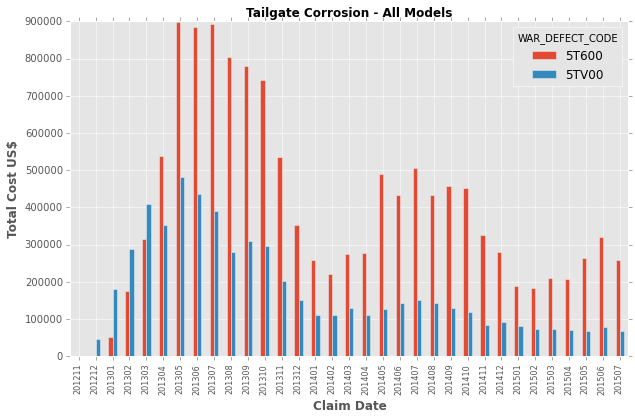

In [9]:
by_cost_all.plot(kind='bar', figsize=(10,6), table=False)
current_axis = plt.gca()
for xticklabels in current_axis.get_xticklabels():
    xticklabels.set_fontsize(8)
plt.title("Tailgate Corrosion - All Models", fontsize=12, weight="bold")
plt.ylabel("Total Cost US$", weight="bold")
plt.xlabel("Claim Date", weight="bold")
plt.show()

### 5T6 By Cost - All Models

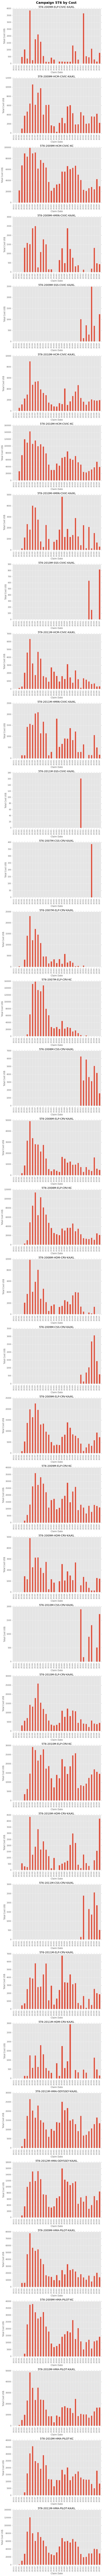

In [10]:
num_charts = len(by_cost['5T600'].columns)

fig, axes = plt.subplots(nrows=num_charts)
models = ['CIVIC', 'CRV', 'ODYSSEY', 'PILOT']

i = 0
for model in models:
    for column in by_cost['5T600'][model].columns:
        by_cost['5T600'][model][column].plot(kind='bar',ax=axes[i], figsize=(8,200))
        axes[i].set_title(column)
        axes[i].set_ylabel("Total Cost US$")
        axes[i].set_xlabel("Claim Date")
        for xticklabels in axes[i].get_xticklabels():
            xticklabels.set_fontsize(8)
        i = i + 1
fig.suptitle("Campaign 5T6 by Cost", x=0.55, y=1.001, fontsize=18, weight="bold")
fig.tight_layout()
plt.show()

### 5TV by Cost - All Models

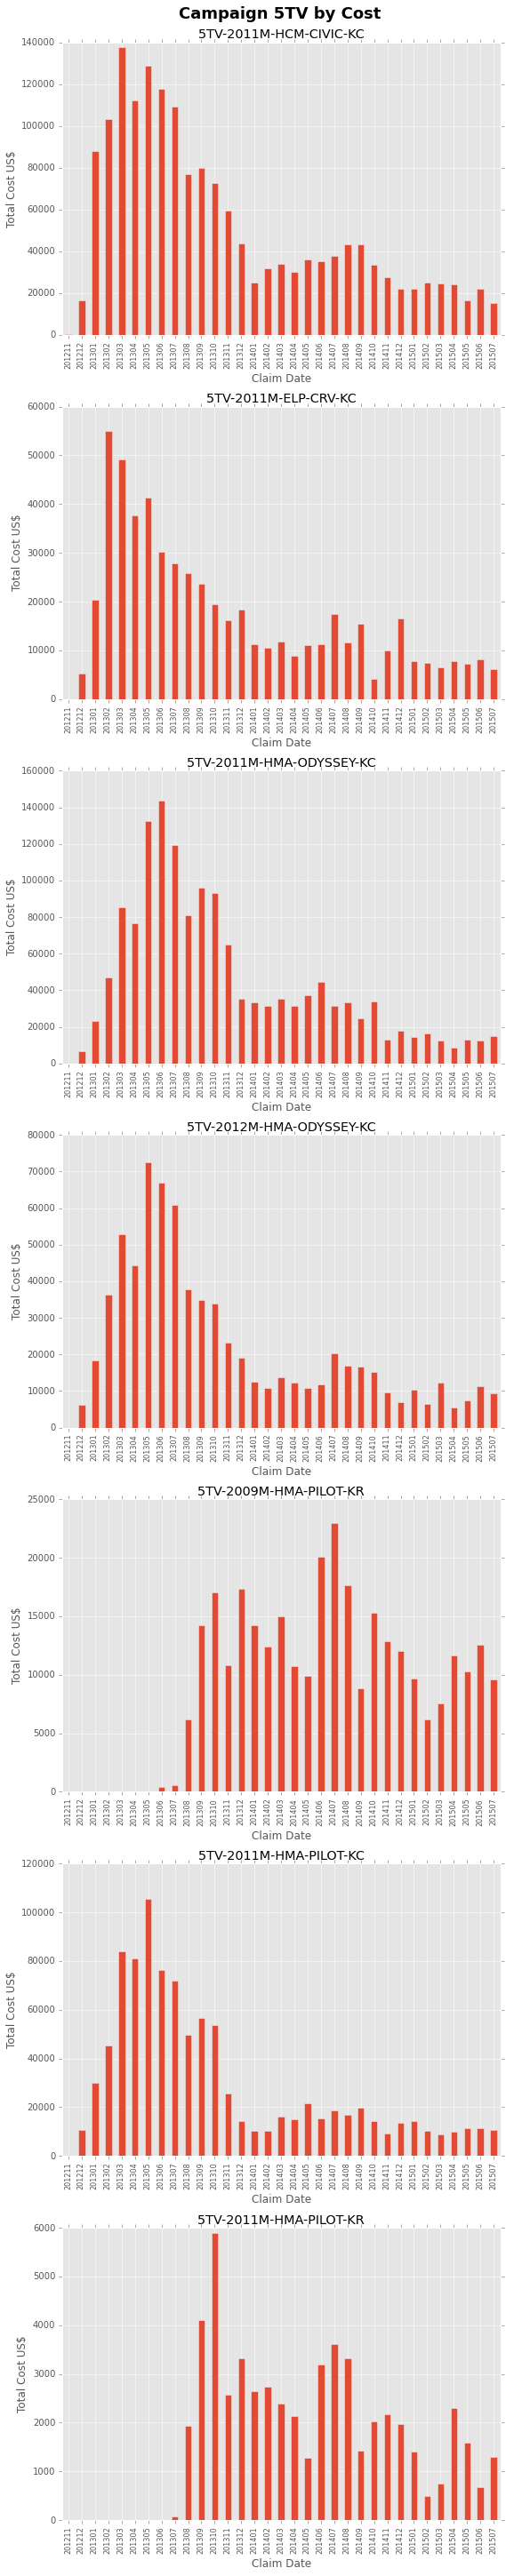

In [11]:
num_charts = len(by_cost['5TV00'].columns)

fig, axes = plt.subplots(nrows=num_charts)
models = ['CIVIC', 'CRV', 'ODYSSEY', 'PILOT']

i = 0
for model in models:
    for column in by_cost['5TV00'][model].columns:
        by_cost['5TV00'][model][column].plot(kind='bar',ax=axes[i], figsize=(8,40))
        axes[i].set_title(column)
        axes[i].set_ylabel("Total Cost US$")
        axes[i].set_xlabel("Claim Date")
        for xticklabels in axes[i].get_xticklabels():
            xticklabels.set_fontsize(8)
        i = i + 1
fig.suptitle("Campaign 5TV by Cost", x=0.55, y=1.005, fontsize=18, weight="bold")
fig.tight_layout()
plt.show()

# By Qty

## Claim Qty by Defect Code vs Claim Date

In [13]:
by_qty_all = pd.pivot_table(data=df, index='WAR_CLAIM_DATE', columns='WAR_DEFECT_CODE', values='VIN', aggfunc='count', fill_value=0)
by_qty_all.head(10)

WAR_DEFECT_CODE,5T600,5TV00
WAR_CLAIM_DATE,,
201211,0,4
201212,5,676
201301,706,2785
201302,1343,3825
201303,1306,3846
201304,1461,2970
201305,2163,4042
201306,2038,2698
201307,2022,2216


## Claim Qty by Defect Code by Destination

In [14]:
total_qty = pd.pivot_table(data=df, index='VEHICLE_DESTN_CODE', columns='WAR_DEFECT_CODE', values='VIN', aggfunc='count', margins=True, fill_value=0)
total_qty

WAR_DEFECT_CODE,5T600,5TV00,All
VEHICLE_DESTN_CODE,,,
KA/KL,12731,0,12731
KC,18758,35263,54021
KR,0,1791,1791
All,31489,37054,68543


## Claim Qty by Defect Code by Model vs Claim Date

In [15]:
by_qty = pd.pivot_table(data=df, index='WAR_CLAIM_DATE', columns=['WAR_DEFECT_CODE','MODEL_NAME','GROUPING'], values='VIN', aggfunc='count', fill_value=0)
by_qty

WAR_DEFECT_CODE                     5T600                            \
MODEL_NAME                          CIVIC                             
GROUPING        5T6-2009M-ELP-CIVIC-KA/KL 5T6-2009M-HCM-CIVIC-KA/KL   
WAR_CLAIM_DATE                                                        
201211                                  0                         0   
201212                                  0                         0   
201301                                  0                         0   
201302                                  3                         6   
201303                                  2                        14   
201304                                  1                        16   
201305                                 10                        24   
201306                                  2                        28   
201307                                  7                        28   
201308                                  7                        34   
201309                                  3                        30   
201310                                  2                        19   
201311                                  1                        17   
201312                                  1                        14   
201401                                  1                         6   
201402                                  2                         6   
201403                                  0                         2   
201404                                  1                         7   
201405                                  1                        10   
201406                                  1                         6   
201407                                  1                        23   
201408                                  1                        20   
201409                                  2                        15   
201410                                  2                         9   
201411                                  2                         8   
201412                                  0                        13   
201501                                  4                        18   
201502                                  1                         9   
201503                                  1                        11   
201504                                  3                        13   
201505                                  2                        13   
201506                                  1                        19   
201507                                  2                         6   

WAR_DEFECT_CODE                                                     \
MODEL_NAME                                                           
GROUPING        5T6-2009M-HCM-CIVIC-KC  5T6-2009M-HMIN-CIVIC-KA/KL   
WAR_CLAIM_DATE                                                       
201211                                0                          0   
201212                                3                          0   
201301                              319                          0   
201302                              583                          0   
201303                              427                          4   
201304                              262                          4   
201305                              273                          5   
201306                              239                          7   
201307                              244                          8   
201308                              159                          2   
201309                              217                          2   
201310                              186                          5   
201311                              164                          4   
201312                              104                          1   
201401                               59                          1   
201402                               73   

### Claim Qty by Defect Code vs Claim Date

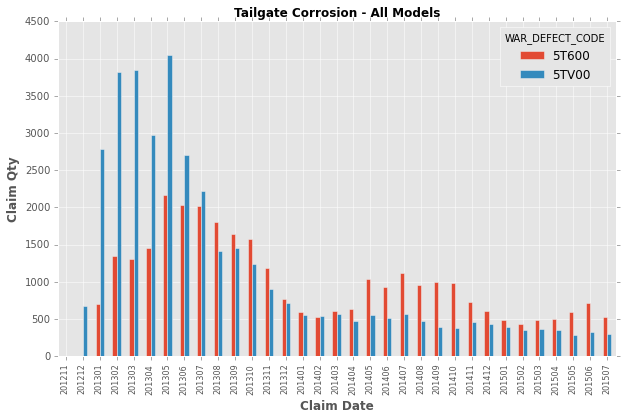

In [16]:
by_qty_all.plot(kind='bar', figsize=(10,6))
current_axis = plt.gca()
for xticklabels in current_axis.get_xticklabels():
    xticklabels.set_fontsize(8)
plt.title("Tailgate Corrosion - All Models", fontsize=12, weight="bold")
plt.ylabel("Claim Qty", weight="bold")
plt.xlabel("Claim Date", weight="bold")
plt.show()

### 5T6 by Qty - All Models

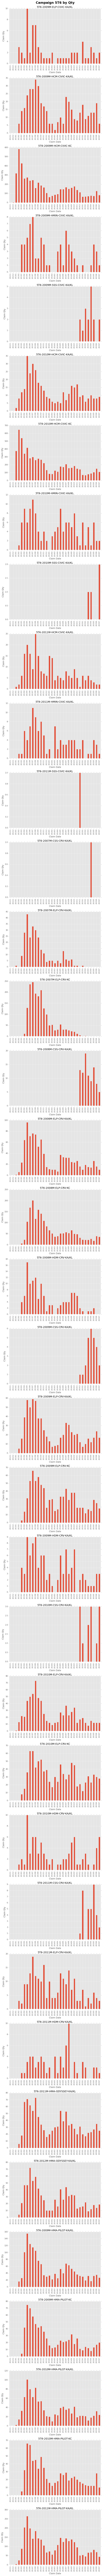

In [17]:
num_charts = len(by_qty['5T600'].columns)

fig, axes = plt.subplots(nrows=num_charts)
models = ['CIVIC', 'CRV', 'ODYSSEY', 'PILOT']

i = 0
for model in models:
    for column in by_qty['5T600'][model].columns:
        by_qty['5T600'][model][column].plot(kind='bar',ax=axes[i], figsize=(8,200))
        axes[i].set_title(column)
        axes[i].set_ylabel("Claim Qty")
        axes[i].set_xlabel("Claim Date")
        for xticklabels in axes[i].get_xticklabels():
            xticklabels.set_fontsize(8)
        i = i + 1
fig.suptitle("Campaign 5T6 by Qty", x=0.54, y=1.001, fontsize=18, weight="bold")
fig.tight_layout()
plt.show()

### 5TV by Qty - All Models

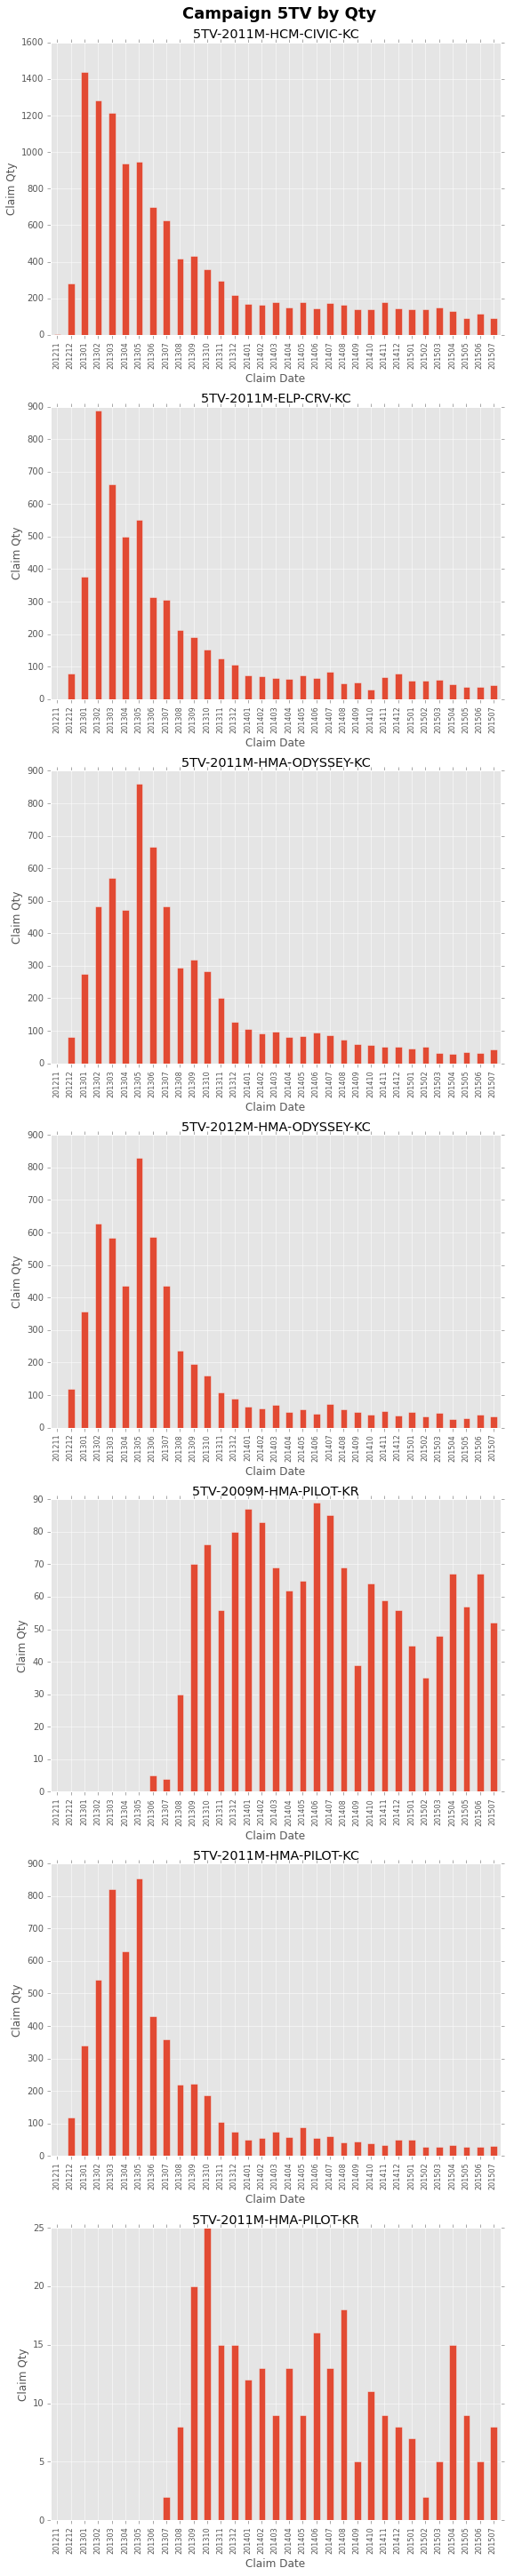

In [18]:
num_charts = len(by_qty['5TV00'].columns)

fig, axes = plt.subplots(nrows=num_charts)
models = ['CIVIC', 'CRV', 'ODYSSEY', 'PILOT']

i = 0
for model in models:
    for column in by_qty['5TV00'][model].columns:
        by_qty['5TV00'][model][column].plot(kind='bar',ax=axes[i], figsize=(8,40))
        axes[i].set_title(column)
        axes[i].set_ylabel("Claim Qty")
        axes[i].set_xlabel("Claim Date")
        for xticklabels in axes[i].get_xticklabels():
            xticklabels.set_fontsize(8)
        i = i + 1
fig.suptitle("Campaign 5TV by Qty", x=0.55, y=1.005, fontsize=18, weight="bold")
fig.tight_layout()
plt.show()

## Interactively Filter By Defect Code and Model

### By Cost

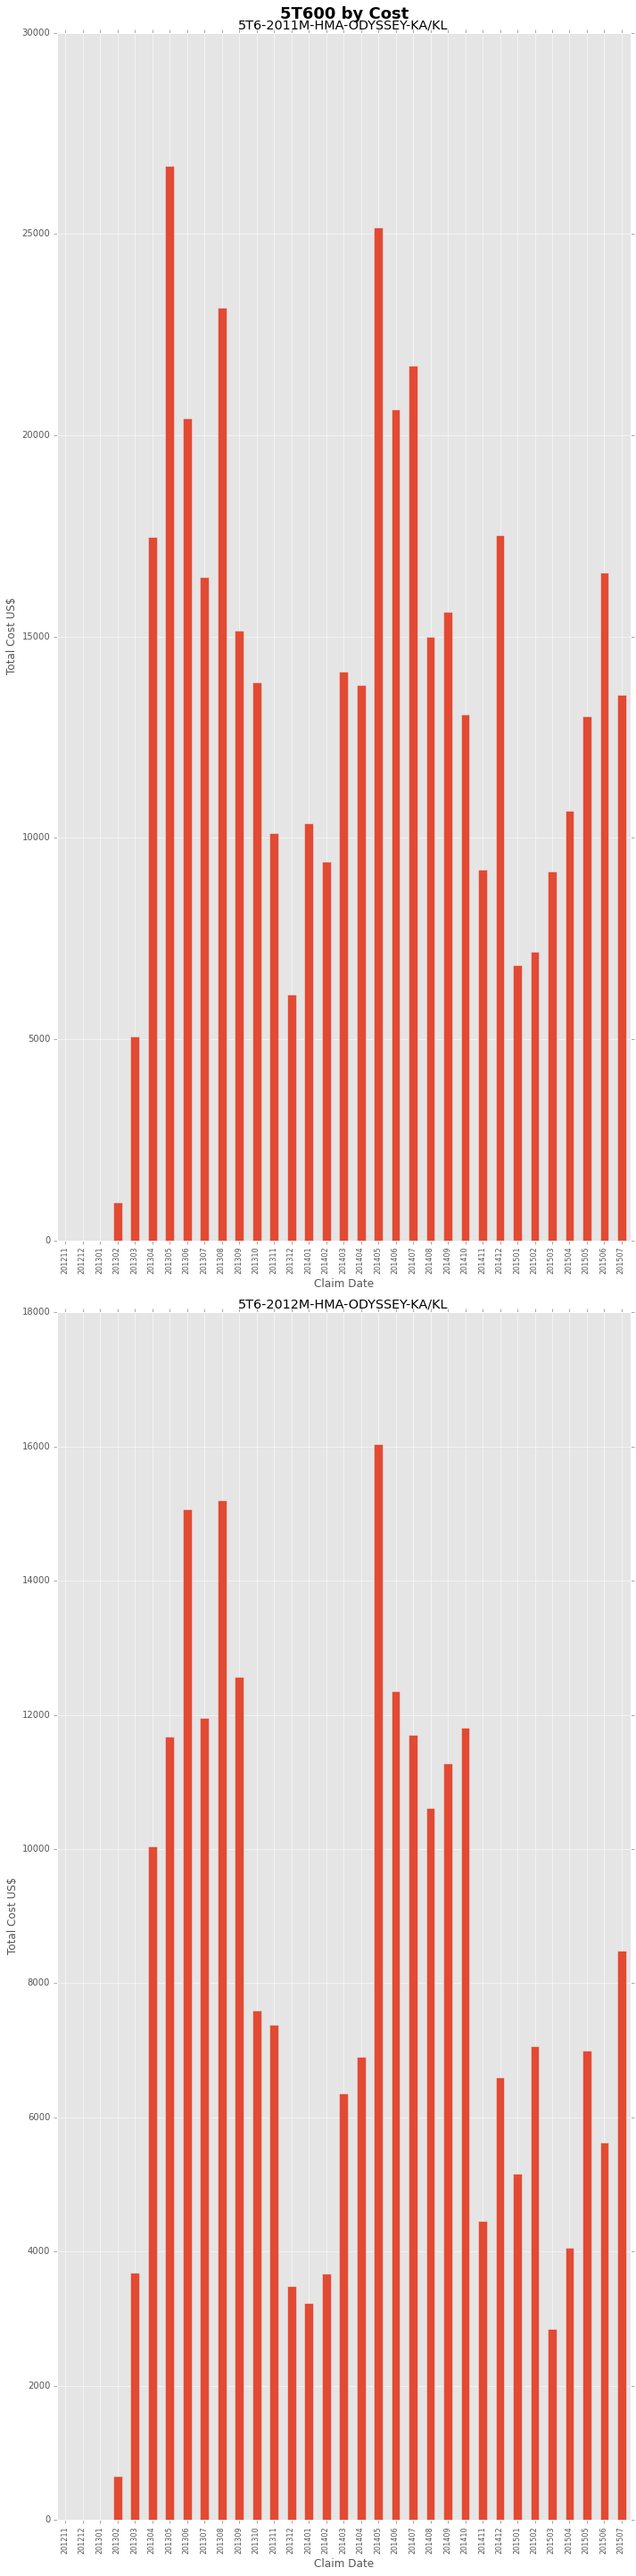

In [29]:
from IPython.html.widgets import interact
from IPython.core.display import HTML

defect_codes = ['5T600','5TV00']
models = ['CIVIC', 'CRV', 'ODYSSEY', 'PILOT']
chart_length = ["40","50","60","70","80"]

@interact
def getAssociatesByTitle(defect_code = defect_codes, model = models, chart_adj=chart_length):
    num_charts = len(by_cost[defect_code][model].columns)

    fig, axes = plt.subplots(nrows=num_charts, figsize=(10, int(chart_adj)))

    i = 0
    for column in by_cost[defect_code][model].columns:
            by_cost[defect_code][model][column].plot(kind='bar',ax=axes[i])
            axes[i].set_title(column)
            axes[i].set_ylabel("Total Cost US$")
            axes[i].set_xlabel("Claim Date")
            for xticklabels in axes[i].get_xticklabels():
                xticklabels.set_fontsize(8)
            i = i + 1
    fig.suptitle(defect_code + " by Cost", x=0.54, y=1.001, fontsize=18, weight="bold")
    fig.tight_layout()
    plt.show()

### By Qty

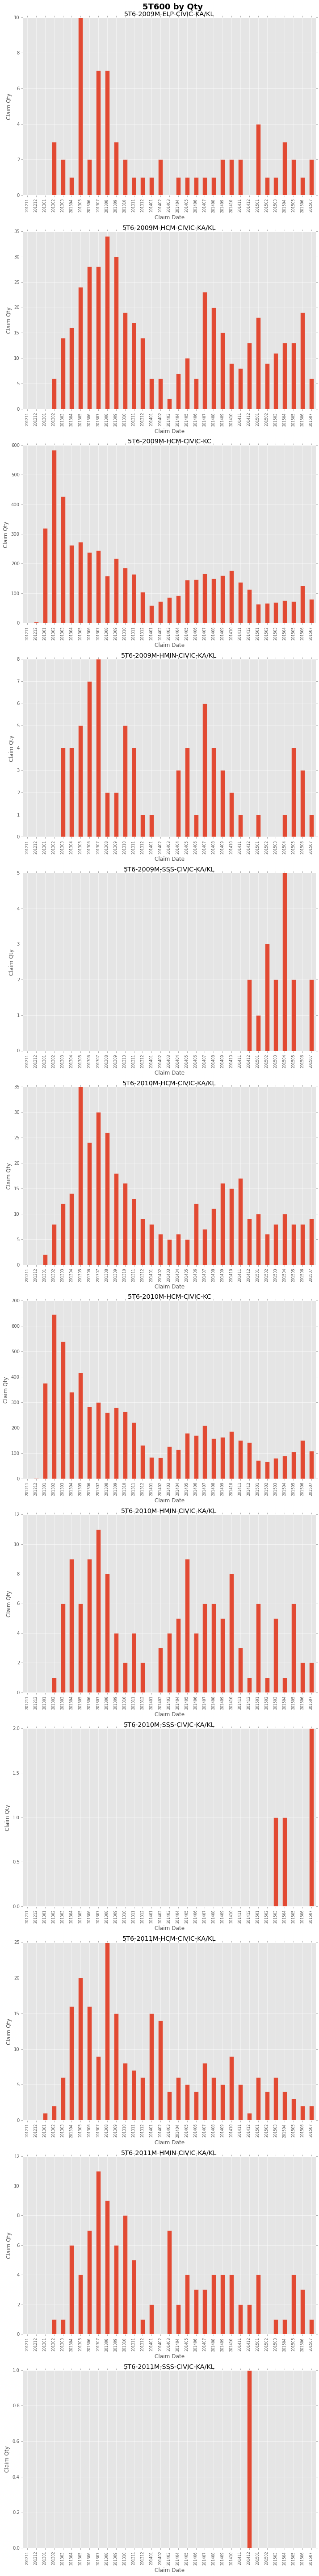

In [28]:
from IPython.html.widgets import interact
from IPython.core.display import HTML

defect_codes = ['5T600','5TV00']
models = ['CIVIC', 'CRV', 'ODYSSEY', 'PILOT']
chart_length = ["40","50","60","70","80"]

@interact
def getAssociatesByTitle(defect_code = defect_codes, model = models, chart_adj=chart_length):
    num_charts = len(by_qty[defect_code][model].columns)

    fig, axes = plt.subplots(nrows=num_charts, figsize=(10, int(chart_adj)))

    i = 0
    for column in by_qty[defect_code][model].columns:
            by_qty[defect_code][model][column].plot(kind='bar',ax=axes[i])
            axes[i].set_title(column)
            axes[i].set_ylabel("Claim Qty")
            axes[i].set_xlabel("Claim Date")
            for xticklabels in axes[i].get_xticklabels():
                xticklabels.set_fontsize(8)
            i = i + 1
    fig.suptitle(defect_code + " by Qty", x=0.54, y=1.001, fontsize=18, weight="bold")
    fig.tight_layout()
    plt.show()